In [1]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.image as mpimg 
import glob


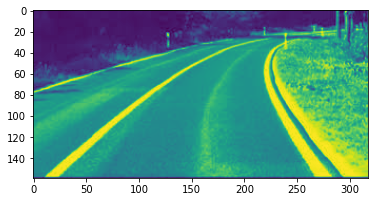

In [2]:
img = cv2.imread('C:/Users/user/Pictures/images.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) 

plt.imshow(gray)
plt.show()


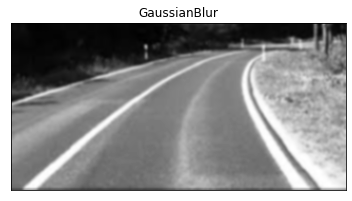

In [16]:
blur = cv2.GaussianBlur(gray ,(5,5),0)
plt.imshow(blur , cmap ='gray')
plt.title('GaussianBlur'), plt.xticks([]), plt.yticks([])
plt.show()


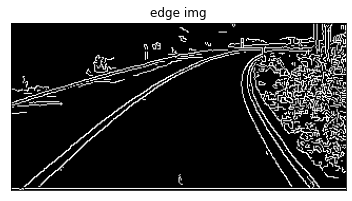

In [5]:
edges = cv2.Canny(img , 100,200)
plt.imshow(edges , cmap="gray")
plt.title('edge img'),plt.xticks([]),plt.yticks([])
plt.show()

In [6]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
lower_yellow = np.array([20,100,100],dtype = "uint8")
upper_yellow = np.array([30,255,255], dtype = "uint8")

mask_yellow = cv2.inRange(img_hsv , lower_yellow , upper_yellow)
mask_white = cv2.inRange(gray , 200, 255)
mask_yw = cv2.bitwise_or(mask_white,mask_yellow)
mask_yw_image = cv2.bitwise_and(gray , mask_yw)

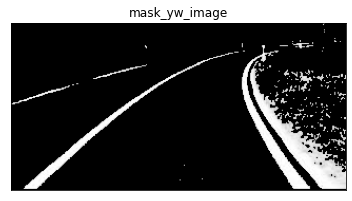

In [7]:
plt.imshow(mask_yw_image, cmap = 'gray')
plt.title('mask_yw_image'),plt.xticks([]),plt.yticks([])
plt.show()

In [8]:
img_hsl = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
lower_yellow = np.array([0,200,0],dtype = "uint8")
upper_yellow = np.array([255,255,255], dtype = "uint8")

mask_yellow = cv2.inRange(img_hsv , lower_yellow , upper_yellow)
mask_white = cv2.inRange(gray , 200, 255)
mask_yw = cv2.bitwise_or(mask_white,mask_yellow)
mask_yw_image = cv2.bitwise_and(gray , mask_yw)

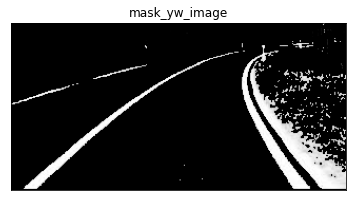

In [9]:
plt.imshow(mask_yw_image, cmap = 'gray')
plt.title('mask_yw_image'),plt.xticks([]),plt.yticks([])
plt.show()

read video frame and region of interest

In [10]:
 def region(img):
    height, width = img.shape
    triangle = np.array([
                       [(100, height), (475, 325), (width, height)]
                       ])
    
    mask = np.zeros_like(img)

    mask = cv2.fillPoly(mask, triangle, 255)
    mask = cv2.bitwise_and(img, mask)
    return mask

In [6]:
plt.figure(figsize =(100,200))
plt.imshow( mask , cmap ="gray")
plt.show()

NameError: name 'plt' is not defined

In [2]:
#def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
   # lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
   # line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
   # lines_drawn(line_img,lines)
   # return line_img

In [7]:
def region_selection(image):
    """
    Determine and cut the region of interest in the input image.
        Parameters:
            image: An np.array compatible with plt.imshow.
    """
    mask = np.zeros_like(image)   
    #Defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(image.shape) > 2:
        channel_count = image.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    #We could have used fixed numbers as the vertices of the polygon,
    #but they will not be applicable to images with different dimesnions.
    rows, cols = image.shape[:2]
    bottom_left  = [cols * 0.1, rows * 0.95]
    top_left     = [cols * 0.4, rows * 0.6]
    bottom_right = [cols * 0.9, rows * 0.95]
    top_right    = [cols * 0.6, rows * 0.6]
    vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    
    masked_image = cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(image, mask,)
    return masked_image

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(masked_image , cmap = 'gray')
plt.title('masked_image'),plt.xticks([]),plt.yticks([])
plt.show()

NameError: name 'plt' is not defined